In [181]:
import pandas as pd
from math import*
import numpy as np
import time
import operator
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)
%matplotlib inline  

In [182]:
# loading the data
gtd = pd.read_excel('gtd_12to15_0616dist.xlsx')
gdelt_header = pd.read_excel('GDELT Metadata.xlsx').columns.values
gdelt = pd.read_table('20150108.export.txt', names=gdelt_header)

In [183]:
gtd.head(1)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,ingroup,ingroup2,ingroup3,gsubname3,motive,guncertain1,guncertain2,guncertain3,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,201201010001,2012,1,1,NaN,0,NaN,153,Pakistan,6,South Asia,Balochistan,Quetta,30.209423,67.018009,1,0,Incident occurred on Joint road.,01/01/2012: A grenade was thrown into a shop o...,1,1,1,0,NaN,.,0,1,0,3,Bombing/Explosion,NaN,.,NaN,.,1,Business,2,Restaurant/Bar/Café,Unknown,Paan Shop,153,Pakistan,NaN,.,NaN,.,NaN,NaN,NaN,.,NaN,.,NaN,.,NaN,NaN,NaN,.,Unknown,NaN,NaN,NaN,NaN,-9,NaN,NaN,NaN,NaN,0,NaN,NaN,-99,0,0,NaN,.,NaN,NaN,.,NaN,NaN,.,NaN,6,Explosives/Bombs/Dynamite,7,Grenade,NaN,.,NaN,.,NaN,.,NaN,.,NaN,.,NaN,.,NaN,0,0,0,12,0,0,1,3,Minor (likely < $1 million),-99,"The targeted shops, as well as several other s...",0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,.,NaN,There is doubt that this incident meets terror...,"""16 hurt in hand grenade attacks in Quetta, Hu...","""Grenade attack injures five in Quetta,"" Daily...","""Grenade attack injures nine in Quetta,"" Plus ...",START Primary Collection,-9,-9,0,-9,NaN


In [184]:
gdelt.head(1)

,GlobalEventID,Day,MonthYear,Year,FractionDate,Actor1Code,Actor1Name,Actor1CountryCode,Actor1KnownGroupCode,Actor1EthnicCode,Actor1Religion1Code,Actor1Religion2Code,Actor1Type1Code,Actor1Type2Code,Actor1Type3Code,Actor2Code,Actor2Name,Actor2CountryCode,Actor2KnownGroupCode,Actor2EthnicCode,Actor2Religion1Code,Actor2Religion2Code,Actor2Type1Code,Actor2Type2Code,Actor2Type3Code,IsRootEvent,EventCode,EventBaseCode,EventRootCode,QuadClass,GoldsteinScale,NumMentions,NumSources,NumArticles,AvgTone,Actor1Geo_Type,Actor1Geo_Fullname,Actor1Geo_CountryCode,Actor1Geo_ADM1Code,Actor1Geo_Lat,Actor1Geo_Long,Actor1Geo_FeatureID,Actor2Geo_Type,Actor2Geo_Fullname,Actor2Geo_CountryCode,Actor2Geo_ADM2Code,Actor2Geo_Lat,Actor2Geo_Long,Actor2Geo_FeatureID,ActionGeo_Type,ActionGeo_Fullname,ActionGeo_CountryCode,ActionGeo_ADM2Code,ActionGeo_Lat,ActionGeo_Long,ActionGeo_FeatureID,DATEADDED,SOURCEURL
0,330986707,20050110,200501,2005,2005.0274,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UAF,TERRORIST,NaN,NaN,NaN,NaN,NaN,UAF,NaN,NaN,0,10,10,1,1,0,10,1,10,2.761341,0,NaN,NaN,NaN,NaN,NaN,NaN,1,United States,US,US,38,-97,US,1,United States,US,US,38,-97,US,20150108,http://freerepublic.com/focus/f-news/3244653/p...


# Choosing the relevant columns
gtd and gdelt are both databases about events where each row signifies a single event. Intuitively, for two events to match, the date of the event and the location of the event should match. So we start by comparing these two to match the two datasets:
- **Location**: combination of (latitude, longitude)
- **Time**: the date of the event

# Similarity measures:
We use a rule-based matching technique where we introduce two different similarity measure and calculate the final similarity measure based on a weighted sum of these similarity measures:

- **Location**: The location is a combination of (latitude,longitude). As this combination specify a point in 2-D euclidean space, the best similarity measure is euclidean distance.
- **Time**: The time (date) can be transalted to the absolute number of days. Once this transformation is done, a simple score as 1/(1+distance(x,y)) can be used to measure the similarity between two integers (number of days)

In [185]:
def euclidean_score(x,y): 
    euc_dist = sqrt(sum(pow(a-b,2) for a, b in zip(x, y)))
    return 1./(1+euc_dist)

def time_score(x,y):
    return 1./(1+abs(x-y))

# Validating the chosen columns 
In this section we look at the distribution of the selected columns across both datasets and make sure that they have overlapping values to be matched

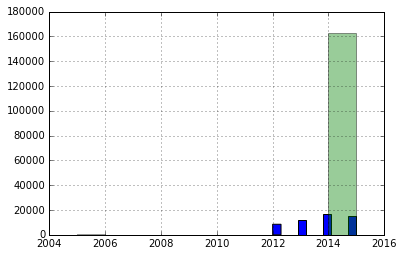

In [186]:
gtd.iyear.hist()
gdelt.Year.hist(alpha=0.4)

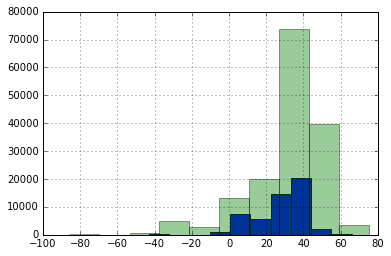

In [187]:
gtd.latitude.hist()
gdelt.ActionGeo_Lat.hist(alpha=0.4)

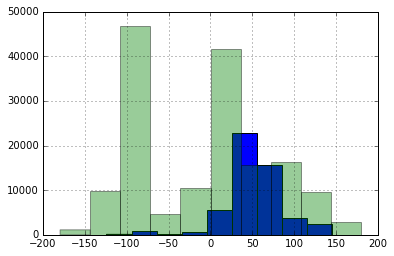

In [188]:
gtd.longitude.hist()
gdelt.ActionGeo_Long.hist(alpha=0.4)

# Scalibility: Limiting the Search Size by dropping NA rows
The rows where the selected columns have NA values can't be matched and hence can be dropped:

In [189]:
print "gtd nan stats:\n", gtd[["latitude","longitude","iyear","imonth","iday"]].isnull().sum()
print "\n\ngdelt nan stats:\n", gdelt[["ActionGeo_Lat","ActionGeo_Long", "Day","MonthYear", "Year"]].isnull().sum()

gtd nan stats:
latitude     345
longitude    345
iyear          0
imonth         0
iday           0
dtype: int64


gdelt nan stats:
ActionGeo_Lat     4005
ActionGeo_Long    4005
Day                  0
MonthYear            0
Year                 0
dtype: int64


In [190]:
gtd = gtd.dropna(subset=["latitude","longitude","iyear","imonth","iday"])
gdelt = gdelt.dropna(subset=["ActionGeo_Lat","ActionGeo_Long", "Day","MonthYear", "Year"])

# Transforming date to number of days

In [191]:
# transforming the date to number of days to be matched later
gtd["num_days"]=gtd["iyear"]*365+gtd["imonth"]*30+gtd["iday"]
gdelt_date = gdelt["Day"].apply(lambda x: datetime.datetime.strptime(str(x), "%Y%m%d"))
gdelt["num_days"]=gdelt_date.apply(lambda y: int(y.strftime("%Y"))*365+int(y.strftime("%m"))*30+int(y.strftime("%d")))

# Scalibility: Limiting the Search Size by sorting both datasets on time
Ideally, to match the two datsets we need to do a search over size (gtd) x size (gdelt) which is extremely expensive (slow). To limit the search size, I sort both datasets on time and then for each pair of gtd (the smaller datasets in terms of number of rows), I will serach over the tuples of gdelt that are closest to gtd row in terms of date (number of days). Specifically, I sort both gtd and gdelt on the nmber of days column. Then, for each row of gtd, I find one row of sorted gdelt which is the closest in terms of number of days. And then I introduce of a window size (100 in the example below) and only search over that gdelt row and the next 200 rows of gdelt. In this way we make sure we search over only relevant rows and not the entire dataset. This will limit the search size to size(gtd) x 200 which is significantly cheaper (faster). The window size can be set to smaller values for even faster matching.

In [192]:
# sorting on number of days #
gtd = gtd.sort("num_days", ascending=0).reset_index(drop=True)
gdelt = gdelt.sort("num_days", ascending=0).reset_index(drop=True)

In [193]:
# function to be used in the next block which finds the closest value of an array to a given value
def find_nearest(array,value):
    idx = (np.abs(array-value)).argmin()
    return idx

In [194]:
window = 100
weight_time = 0.75
weight_lat_long = 0.25
matched_tuple={}
for gtd_index, gtd_row in gtd.iterrows():
    scores = {}
    # find the closest gdelt row to the current gtd row in terms of num_days.
    gdelt_index_closest = find_nearest(gdelt['num_days'],gtd["num_days"][gtd_index])
    for gdelt_index, gdelt_row in gdelt[gdelt_index_closest:gdelt_index_closest+window].iterrows():
        gtd_lat_long = np.array(gtd_row[["latitude", "longitude"]])
        gdelt_lat_long = np.array(gdelt_row[["ActionGeo_Lat", "ActionGeo_Long"]])
        gtd_time = np.array(gtd_row["num_days"])
        gdelt_time = np.array(gdelt_row["num_days"])
        score = (weight_time*euclidean_score(gtd_lat_long, gdelt_lat_long))+(weight_lat_long*time_score(gtd_time, gdelt_time))
        scores[gdelt_index] = score
    # find the best match for each gtd tuple and store the result in a dictionary
    gdelt_index_matched = max(scores, key=scores.get)
    best_score = scores[gdelt_index_matched]
    matched_tuple[(gtd_index, gdelt_index_matched)]=best_score
sorted_matched_tuples = sorted(matched_tuple.items(), key=operator.itemgetter(1), reverse= True)

# Creating a dataframe of the results

In [195]:
final_df = pd.DataFrame()
match_df = pd.DataFrame.from_dict(sorted_matched_tuples[0:200])
final_df['eventid'] = match_df[0].apply(lambda r:r[0])
final_df[['iyear','imonth','iday', 'latitude', 'longitude']] = \
                final_df['eventid'].apply(lambda r:gtd[['iyear','imonth','iday', 'latitude', 'longitude']].iloc[r])
final_df['GlobalEventID'] = match_df[0].apply(lambda r:r[1])
final_df[['Day',"ActionGeo_Lat","ActionGeo_Long"]] = final_df['GlobalEventID']\
                .apply(lambda r:gdelt[['Day',"ActionGeo_Lat","ActionGeo_Long"]].iloc[r])
final_df['score']=match_df[1]

# Final Results
- **Gtd relevant columns**: iyear, imonth, iday, latitude, longitude
- **GDelt corresponding relevant columns**: Day, ActionGeo_Lat, ActionGeo_Long
Reason for column selection:

Set1: 
- Relevant columns: iyear, imonth, iday - Day           
- Similarity measure used: Normalized Eucledian distance 
- Reason: Eucledian distance works well for Integer values 
- Weight assigned = 0.75--> because time is the most important factor to match two events, I gave it a higher weight

Set 2:
- Relevant columns: latitude, longitude, ActionGeo_Lat, ActionGeo_Long           
- Similarity measure used: Normalized Eucledian distance 
- Reason: Eucledian distance works well for Integer values 
- Weight assigned = 0.25--> Because location is the second most important column to match two events and hence I gave it a lower weight than time

In [196]:
print "Top 200 matched tuples with their similar columns and their final weighted similarity score:\n" 
final_df

Top 200 matched tuples with their similar columns and their final weighted similarity score:



,eventid,iyear,imonth,iday,latitude,longitude,GlobalEventID,Day,ActionGeo_Lat,ActionGeo_Long,score
0,14364,2015,1,8,48.816769,2.318555,361,20150108,48.81620,2.31394,0.996529
1,14436,2015,1,7,48.789746,2.287296,153820,20150107,48.80240,2.29346,0.989590
2,15535,2014,12,9,31.410724,73.108405,156004,20141209,31.41670,73.08330,0.981132
3,14395,2015,1,8,23.745937,90.376489,400,20150108,23.72310,90.40860,0.971568
4,14427,2015,1,7,48.859172,2.370553,153821,20150107,48.81620,2.31394,0.950231
5,14353,2015,1,8,33.333034,44.321263,322,20150108,33.33860,44.39390,0.949073
6,14376,2015,1,8,33.230986,44.342575,322,20150108,33.33860,44.39390,0.920105
7,14345,2015,1,8,33.255202,44.479551,322,20150108,33.33860,44.39390,0.919914
8,14322,2015,1,9,33.596908,73.050429,60,20150109,33.70000,73.16670,0.899130
9,15532,2014,12,9,26.113889,50.481667,156028,20141209,26.23610,50.58310,0.897209
